In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def create_PLOT(X_LIM=15, Y_LIM=10, fig_size=(16, 8)):
    fig, ax =plt.subplots(1, 2, figsize=fig_size)
    for i in range(len(ax)):
        ax[i].set_xlim((-X_LIM, X_LIM))
        ax[i].set_ylim((-Y_LIM, Y_LIM))
        ax[i].plot([-X_LIM, X_LIM], [0, 0], c="r")
        ax[i].plot([0, 0], [-Y_LIM, Y_LIM], c="r")
        
    return fig, ax

In [4]:
def print_obj(ax, obj, colour, label):
    """
    print object 
    Argument:
        ax (object)     : graph object contain graph position
        obj (ndarray)   : shape(m, n), object.
        color (string)  : contain which colour object print
        label (string)  : label of object
    return:
        ax (object)     :
    """
    m, n = obj.shape
    M = obj[:m-1, :]
    M = M.T
    for i in range(n):
        ax.plot([M[i, 0], M[(i+1)%n, 0]], [M[i, 1], M[(i+1)%n, 1]], c=colour, label=label)
        ax.text(M[i, 0], M[i, 1], "({}, {})".format(np.around(M[i, 0], 1), np.around(M[i, 1], 1)))

    return ax

In [5]:
def reflection(theta, c, obj, X_LIM=10, Y_LIM=10):
    """
    Reflect the obj 
    Argument:
        theta (scaler)      : theta is the angle with respect to x axis.
        c  (scaler)         : y intersect i.e. the line intersect y-axis at (0, c) point.
        obj (ndarray)       : shape(m, n), it is the object.
        X_LIM (scaler)      : limit of graph along x-axis.
        Y_LIM (scaler)      : limit of graph along y-axis.
    Return:
        fig (object)        : graph object
        ax (object)         : graph object (matrics)
    """
    # positive translation vector
    T_v = np.array([[1, 0, 0], \
                    [0, 1, c], \
                    [0, 0, 1]])
    # negetive translation vector
    T_minus_v = np.array([[1, 0, 0], \
                          [0, 1,-c], \
                          [0, 0, 1]])
    # rotation vector (theta negetive rotation)
    R_minus_theta = np.array([[ np.cos(np.deg2rad(theta)), np.sin(np.deg2rad(theta)), 0], \
                              [-np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0], \
                              [                         0,                         0, 1]])
    
    # rotation vector (theta positive rotation)
    R_theta = np.array([[np.cos(np.deg2rad(theta)),-np.sin(np.deg2rad(theta)), 0], \
                        [np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0], \
                        [                        0,                         0, 1]])
    # reflection vector
    Ref_x =  np.array([[1, 0, 0], \
                       [0,-1, 0], \
                       [0, 0, 1]])
    
    m = np.tan(np.deg2rad(theta))
    # create graph 
    fig, ax = create_PLOT(X_LIM=X_LIM, Y_LIM=Y_LIM)

    x = np.arange(-X_LIM, X_LIM+1)

    ax[0].plot(x, m*x+c, label="y=mx+c")
    ax[1].plot(x, m*x+c, label="y=mx+c")
    ax[0].set_title("Before Reflection")
    # print object 
    ax[0] = print_obj(ax[0], obj, "green", label="Original_Object")

    obj1 = np.dot(T_minus_v, obj)
    obj2 = np.dot(R_minus_theta, obj1)
    obj3 = np.dot(Ref_x, obj2)
    obj4 = np.dot(R_theta, obj3)
    obj_prime = np.dot(T_v, obj4)
    ax[1].set_title("After Reflection")
    # print reflected object
    ax[1] = print_obj(ax[1], obj_prime, "blue", label="Reflected Object")
    
    return fig, ax

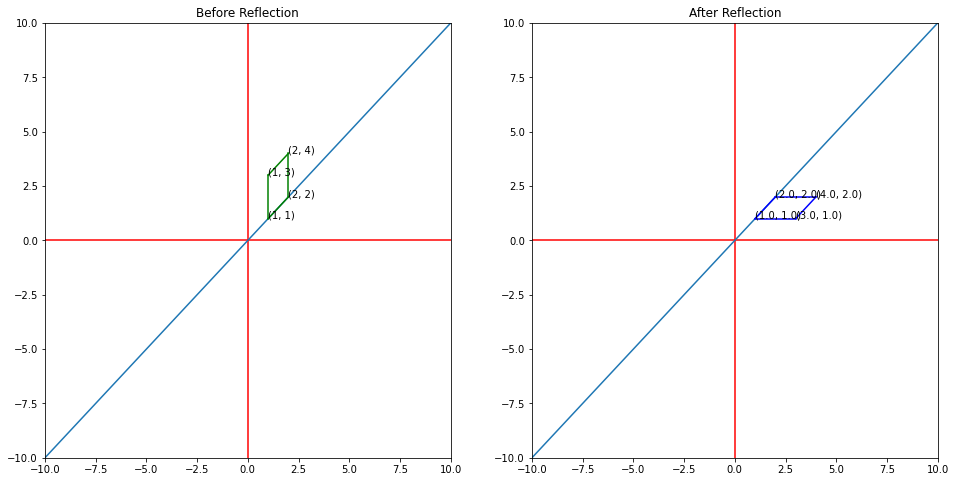

In [6]:
# rectangle of cordinate A(1, 1), B(2, 2), C(2, 4), D(1, 3)
obj = np.array([[1, 2, 2, 1], \
                [1, 2, 4, 3],\
                [1, 1, 1, 1]])


fig, ax = reflection(45, 0, obj)

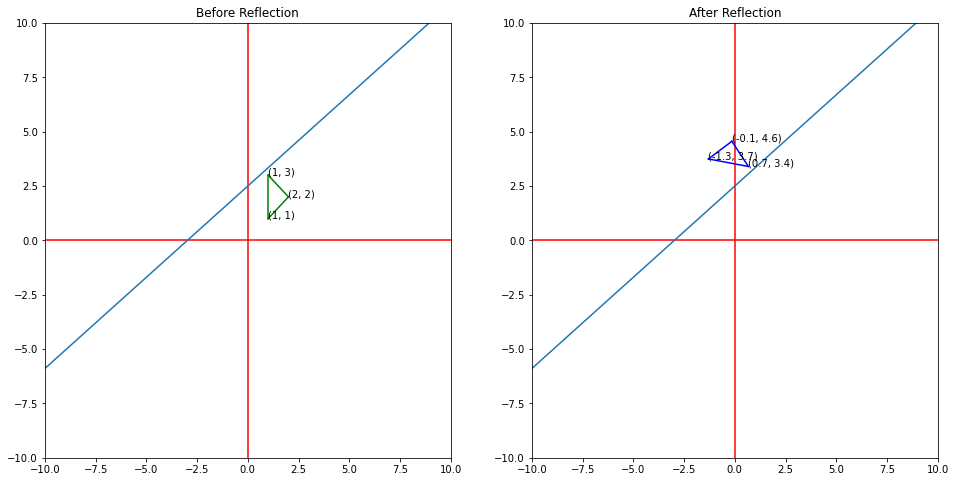

In [7]:
# trangle of cordinate A(1, 1), B(2, 2), C(1, 3)
obj = np.array([[1, 2, 1], \
                [1, 2, 3],\
                [1, 1, 1]])


fig, ax = reflection(40, 2.5, obj)

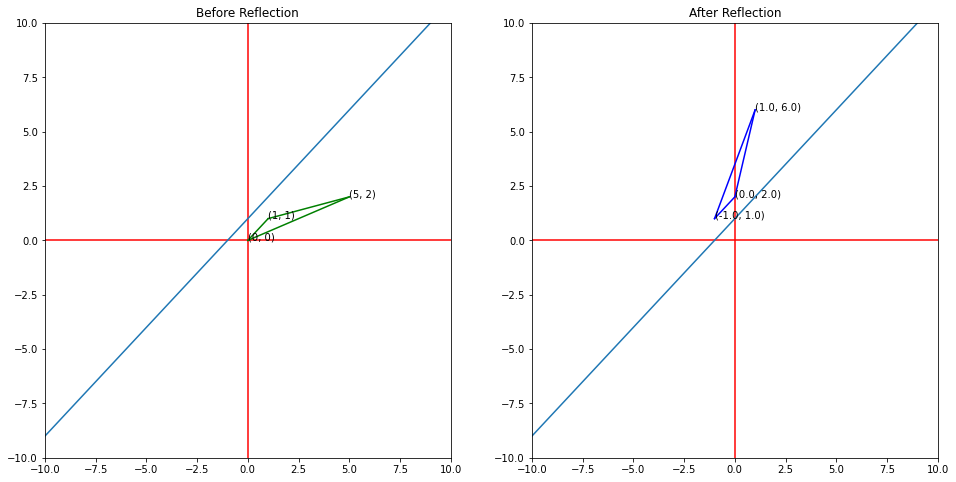

In [9]:
# trangle of cordinate A(0, 0), B(1, 1), C(5, 2)
obj2 = np.array([[0, 1, 5], \
                 [0, 1, 2],\
                 [1, 1, 1]])

theta = 45
c = 1
fig, ax = reflection(theta, c, obj2)